<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/ro_freq_sd_mean.csv')
df.head()

,chip,chipinstance,sd_freq,mean,label
0,Chip1,C1I1,17.361956,220.55,0
1,Chip1,C1I2,16.164158,206.20,1
2,Chip1,C1I3,15.573616,199.25,1
3,Chip1,C1I4,15.307514,194.80,1
4,Chip1,C1I5,15.079042,190.85,1


In [3]:
df['sd_freq'] = df['sd_freq']
df['m_freq'] = df['mean']
# del df['sd_freq']
del df['mean']
print(df)


       chip chipinstance    sd_freq  label  m_freq
0     Chip1         C1I1  17.361956      0  220.55
1     Chip1         C1I2  16.164158      1  206.20
2     Chip1         C1I3  15.573616      1  199.25
3     Chip1         C1I4  15.307514      1  194.80
4     Chip1         C1I5  15.079042      1  190.85
..      ...          ...        ...    ...     ...
795  Chip32       C32I21  13.473585      1  176.75
796  Chip32       C32I22  13.118594      1  170.35
797  Chip32       C32I23  12.648715      1  163.90
798  Chip32       C32I24  12.617349      1  163.35
799  Chip32       C32I25  16.564722      0  215.10

[800 rows x 5 columns]


Text(0, 0.5, 'm_freq')

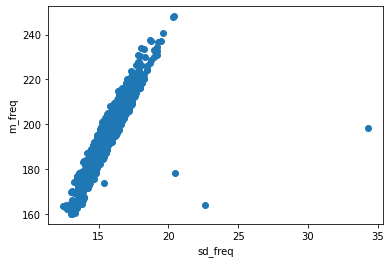

In [4]:
plt.scatter(df['sd_freq'],df['m_freq'])
plt.xlabel('sd_freq')
plt.ylabel('m_freq')

In [5]:
df0 = pd.DataFrame(df.loc[df['label'] == 0])
df1 = pd.DataFrame(df.loc[df['label'] == 1])

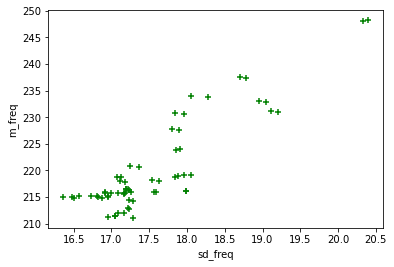

In [6]:
plt.xlabel('sd_freq')
plt.ylabel('m_freq')
plt.scatter(df0['sd_freq'], df0['m_freq'],color="green",marker='+')

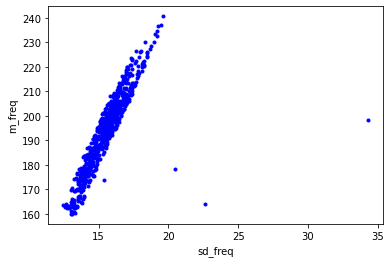

In [7]:
plt.xlabel('sd_freq')
plt.ylabel('m_freq')
# plt.scatter(df0['freq'], df0['values'],color="green",marker='+')
plt.scatter(df1['sd_freq'], df1['m_freq'],color="blue",marker='.')

In [8]:
# scaler = MinMaxScaler()

# scaler.fit(df[['freq']])
# df['freq'] = scaler.transform(df[['freq']])

# scaler.fit(df[['time']])
# df['time'] = scaler.transform(df[['time']])

In [9]:
# df.head()

In [10]:
# plt.scatter(df.time,df['freq'])
# plt.xlabel('time')
# plt.ylabel('freq')

<h4 style='color:purple'>Elbow Plot</h4>

In [11]:
sse = []
k_rng = range(1,9)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sd_freq','m_freq']])
    sse.append(km.inertia_)

C:\Users\Ashutosh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


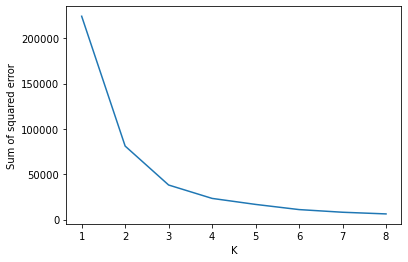

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['sd_freq','m_freq']])
y_predicted


array([0, 2, 2, 1, 1, 1, 1, 3, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3,
       3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 3, 3, 3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 1, 3, 3, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 3, 3, 3, 0, 0, 2, 2, 1, 1, 1, 1,
       3, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 2, 1, 1,
       1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 3,
       3, 0, 0, 2, 2, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       3, 3, 3, 3, 0, 0, 2, 2, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 3, 3, 3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0,

In [14]:
df['cluster']=y_predicted
df.head()

,chip,chipinstance,sd_freq,label,m_freq,cluster
0,Chip1,C1I1,17.361956,0,220.55,0
1,Chip1,C1I2,16.164158,1,206.20,2
2,Chip1,C1I3,15.573616,1,199.25,2
3,Chip1,C1I4,15.307514,1,194.80,1
4,Chip1,C1I5,15.079042,1,190.85,1


In [15]:
km.cluster_centers_

array([[ 17.63420042, 220.49210526],
       [ 15.1225026 , 190.07851064],
       [ 16.27518401, 203.40185874],
       [ 13.84258906, 171.62546012]])

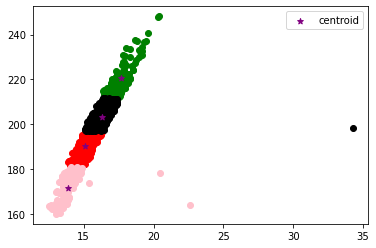

In [16]:
df10 = df[df.cluster==0]
df20 = df[df.cluster==1]
df30 = df[df.cluster==2]
df40 = df[df.cluster==3]
# df50 = df[df.cluster==4]
# df60 = df[df.cluster==5]
plt.scatter(df10['sd_freq'],df10['m_freq'],color='green')
plt.scatter(df20['sd_freq'],df20['m_freq'],color='red')
plt.scatter(df30['sd_freq'],df30['m_freq'],color='black')
plt.scatter(df40['sd_freq'],df40['m_freq'],color='pink')
# plt.scatter(df50['sd_freq'],df50['m_freq'],color='cyan')
# plt.scatter(df60['sd_freq'],df60['m_freq'],color='gray')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [17]:
df

,chip,chipinstance,sd_freq,label,m_freq,cluster
0,Chip1,C1I1,17.361956,0,220.55,0
1,Chip1,C1I2,16.164158,1,206.20,2
2,Chip1,C1I3,15.573616,1,199.25,2
3,Chip1,C1I4,15.307514,1,194.80,1
4,Chip1,C1I5,15.079042,1,190.85,1
...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,3
796,Chip32,C32I22,13.118594,1,170.35,3
797,Chip32,C32I23,12.648715,1,163.90,3
798,Chip32,C32I24,12.617349,1,163.35,3


In [18]:
import os  
os.makedirs('csv_cluster_sd', exist_ok=True)  
df.to_csv('csv_cluster_sd/out.csv')  

In [19]:
df0 = pd.DataFrame(df.loc[df['label'] == 0])

In [20]:
import os  
os.makedirs('csv_cluster_sd', exist_ok=True)  
df0.to_csv('csv_cluster_sd/golden.csv')  

In [21]:
df1 = pd.DataFrame(df.loc[df['label'] == 1])

In [22]:
os.makedirs('csv_cluster_sd', exist_ok=True)  
df1.to_csv('csv_cluster_sd/trojan.csv')  

In [23]:
df['predicted'] = df['cluster']
df

,chip,chipinstance,sd_freq,label,m_freq,cluster,predicted
0,Chip1,C1I1,17.361956,0,220.55,0,0
1,Chip1,C1I2,16.164158,1,206.20,2,2
2,Chip1,C1I3,15.573616,1,199.25,2,2
3,Chip1,C1I4,15.307514,1,194.80,1,1
4,Chip1,C1I5,15.079042,1,190.85,1,1
...,...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,3,3
796,Chip32,C32I22,13.118594,1,170.35,3,3
797,Chip32,C32I23,12.648715,1,163.90,3,3
798,Chip32,C32I24,12.617349,1,163.35,3,3


In [24]:
df['predicted'] = df['predicted'].replace([2,3], 1)
# replace 2 and 3 by 1

In [25]:
df

,chip,chipinstance,sd_freq,label,m_freq,cluster,predicted
0,Chip1,C1I1,17.361956,0,220.55,0,0
1,Chip1,C1I2,16.164158,1,206.20,2,1
2,Chip1,C1I3,15.573616,1,199.25,2,1
3,Chip1,C1I4,15.307514,1,194.80,1,1
4,Chip1,C1I5,15.079042,1,190.85,1,1
...,...,...,...,...,...,...,...
795,Chip32,C32I21,13.473585,1,176.75,3,1
796,Chip32,C32I22,13.118594,1,170.35,3,1
797,Chip32,C32I23,12.648715,1,163.90,3,1
798,Chip32,C32I24,12.617349,1,163.35,3,1


In [26]:
y_test = df.label
y_pred_class = df.predicted

In [27]:
dfz = df['label'].value_counts()
print(dfz)

1    736
0     64
Name: label, dtype: int64


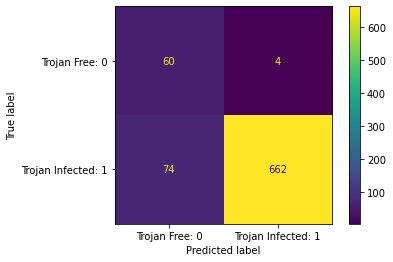

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_class)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Trojan Free: 0','Trojan Infected: 1'])
cmd.plot()


In [29]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
TPR = TP/(TP + FN)
TNR = TN/(TN + FP)
FNR = FN/(FN + TP)
FPR = FN/(FN + TN)

print(TN)
print(cm)
result = [TPR, TNR, FNR, FPR]
print(result)

60
[[ 60   4]
 [ 74 662]]
[0.8994565217391305, 0.9375, 0.10054347826086957, 0.5522388059701493]


In [30]:
acc = (TP + TN)/(TP + TN + FP + FN)

In [31]:
print(acc)

0.9025


In [32]:
precision = TP/(TP + FP)
print(precision)

0.993993993993994
